<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_07/Part_2_02_Custom_Dropout_MC_Alpha_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Define custom MCAlphaDropout layer (Monte Carlo style)
class MCAlphaDropout(layers.Layer):
    def __init__(self, rate, **kwargs):
        super().__init__(**kwargs)
        self.rate = rate

    def call(self, inputs, training=None):
        if training:
            keep_prob = 1.0 - self.rate
            noise = tf.random.normal(tf.shape(inputs))
            dropped = inputs * keep_prob + noise * tf.sqrt(self.rate)
            return dropped
        return inputs

In [4]:
# Standard Dropout Model
def build_dropout_model():
    return keras.Sequential([
        keras.Input(shape=(784,)),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(10, activation="softmax")
    ])

In [5]:
# Custom MCAlphaDropout Model
def build_mc_dropout_model():
    return keras.Sequential([
        keras.Input(shape=(784,)),
        layers.Dense(256, activation="relu"),
        MCAlphaDropout(0.3),
        layers.Dense(128, activation="relu"),
        MCAlphaDropout(0.3),
        layers.Dense(10, activation="softmax")
    ])

In [6]:
# Compile both models
dropout_model = build_dropout_model()
mc_model = build_mc_dropout_model()

dropout_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
mc_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [7]:
# Train both
history_dropout = dropout_model.fit(
    x_train, y_train, validation_data=(x_test, y_test),
    epochs=5, batch_size=32, verbose=0
)

history_mc = mc_model.fit(
    x_train, y_train, validation_data=(x_test, y_test),
    epochs=5, batch_size=32, verbose=0
)

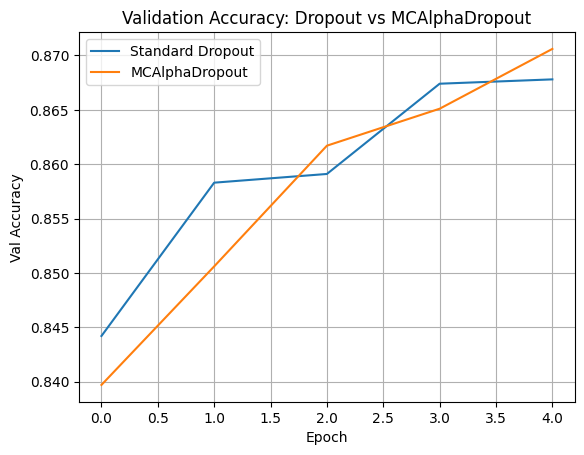

In [8]:
# Plot comparison
plt.plot(history_dropout.history['val_accuracy'], label='Standard Dropout')
plt.plot(history_mc.history['val_accuracy'], label='MCAlphaDropout')
plt.title("Validation Accuracy: Dropout vs MCAlphaDropout")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.legend()
plt.grid(True)
plt.show()
